In [1]:
import warnings
warnings.filterwarnings('ignore')

# modules we'll use
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score


import scipy.stats as stats

from sklearn.feature_selection import SelectKBest, RFE, f_regression

import os
import missingno as msno

#Access Stored Data
from env import host,db,protocol,password,user,mysqlcon
import wrangle
import env

# Acquisition
## get_zillow_data()
* Login credentials will be needed to retrieve the data from mysql workbench
* Used stored get_zillow_data() function to retrieve zillow data from mysql workbench and stored the data on my machine
* The get get_zillow_data() function checks for the file locally on your machine first and if it's not there it is fetched from the mysql workbench. I've renamed features for readability inside the function. 
* The function stores the fetched data on your machine and returns a dataframe for you to work with.
* Also changed feature names inside the function 

* df.head() to get a view of the data too make sure it's what you wanted. df.shape() to get a row and column count
* Created a pairplot of the data to view the data distribution and possible correlations
* Pulled in the data dictionary of features and their discriptions

In [2]:
#stored the dataframe into a variable
df = wrangle.get_zillow_data()

In [3]:
#verify the data is what you want
df.head()

,Unnamed: 0,bedrooms,bathrooms,area,tax_amount,numberofstories,structure_taxvalue,zoning_desc,trans_date,year_built,fips,prop_landuse_desc,county_landuse_code,tax_value
0,0,3.0,1.0,1048.0,4354.36,NaN,78016.0,BUR1YY,2017-01-11,1944.0,6037.0,Single Family Residential,0100,390086.0
1,1,2.0,2.0,1491.0,3694.02,NaN,137253.0,LAR1,2017-01-11,1959.0,6037.0,Single Family Residential,0100,291668.0
2,2,2.0,3.0,1488.0,2064.79,NaN,121535.0,LAR1,2017-01-11,1965.0,6037.0,Single Family Residential,0100,285789.0
3,3,2.0,1.0,644.0,8348.87,NaN,136918.0,LAR1,2017-01-11,1925.0,6037.0,Single Family Residential,0100,684605.0
4,4,3.0,2.0,1710.0,12797.47,NaN,62732.0,LARE15,2017-01-11,1952.0,6037.0,Single Family Residential,0101,131886.0


In [4]:
#get row and column count
df.shape

(56078, 14)

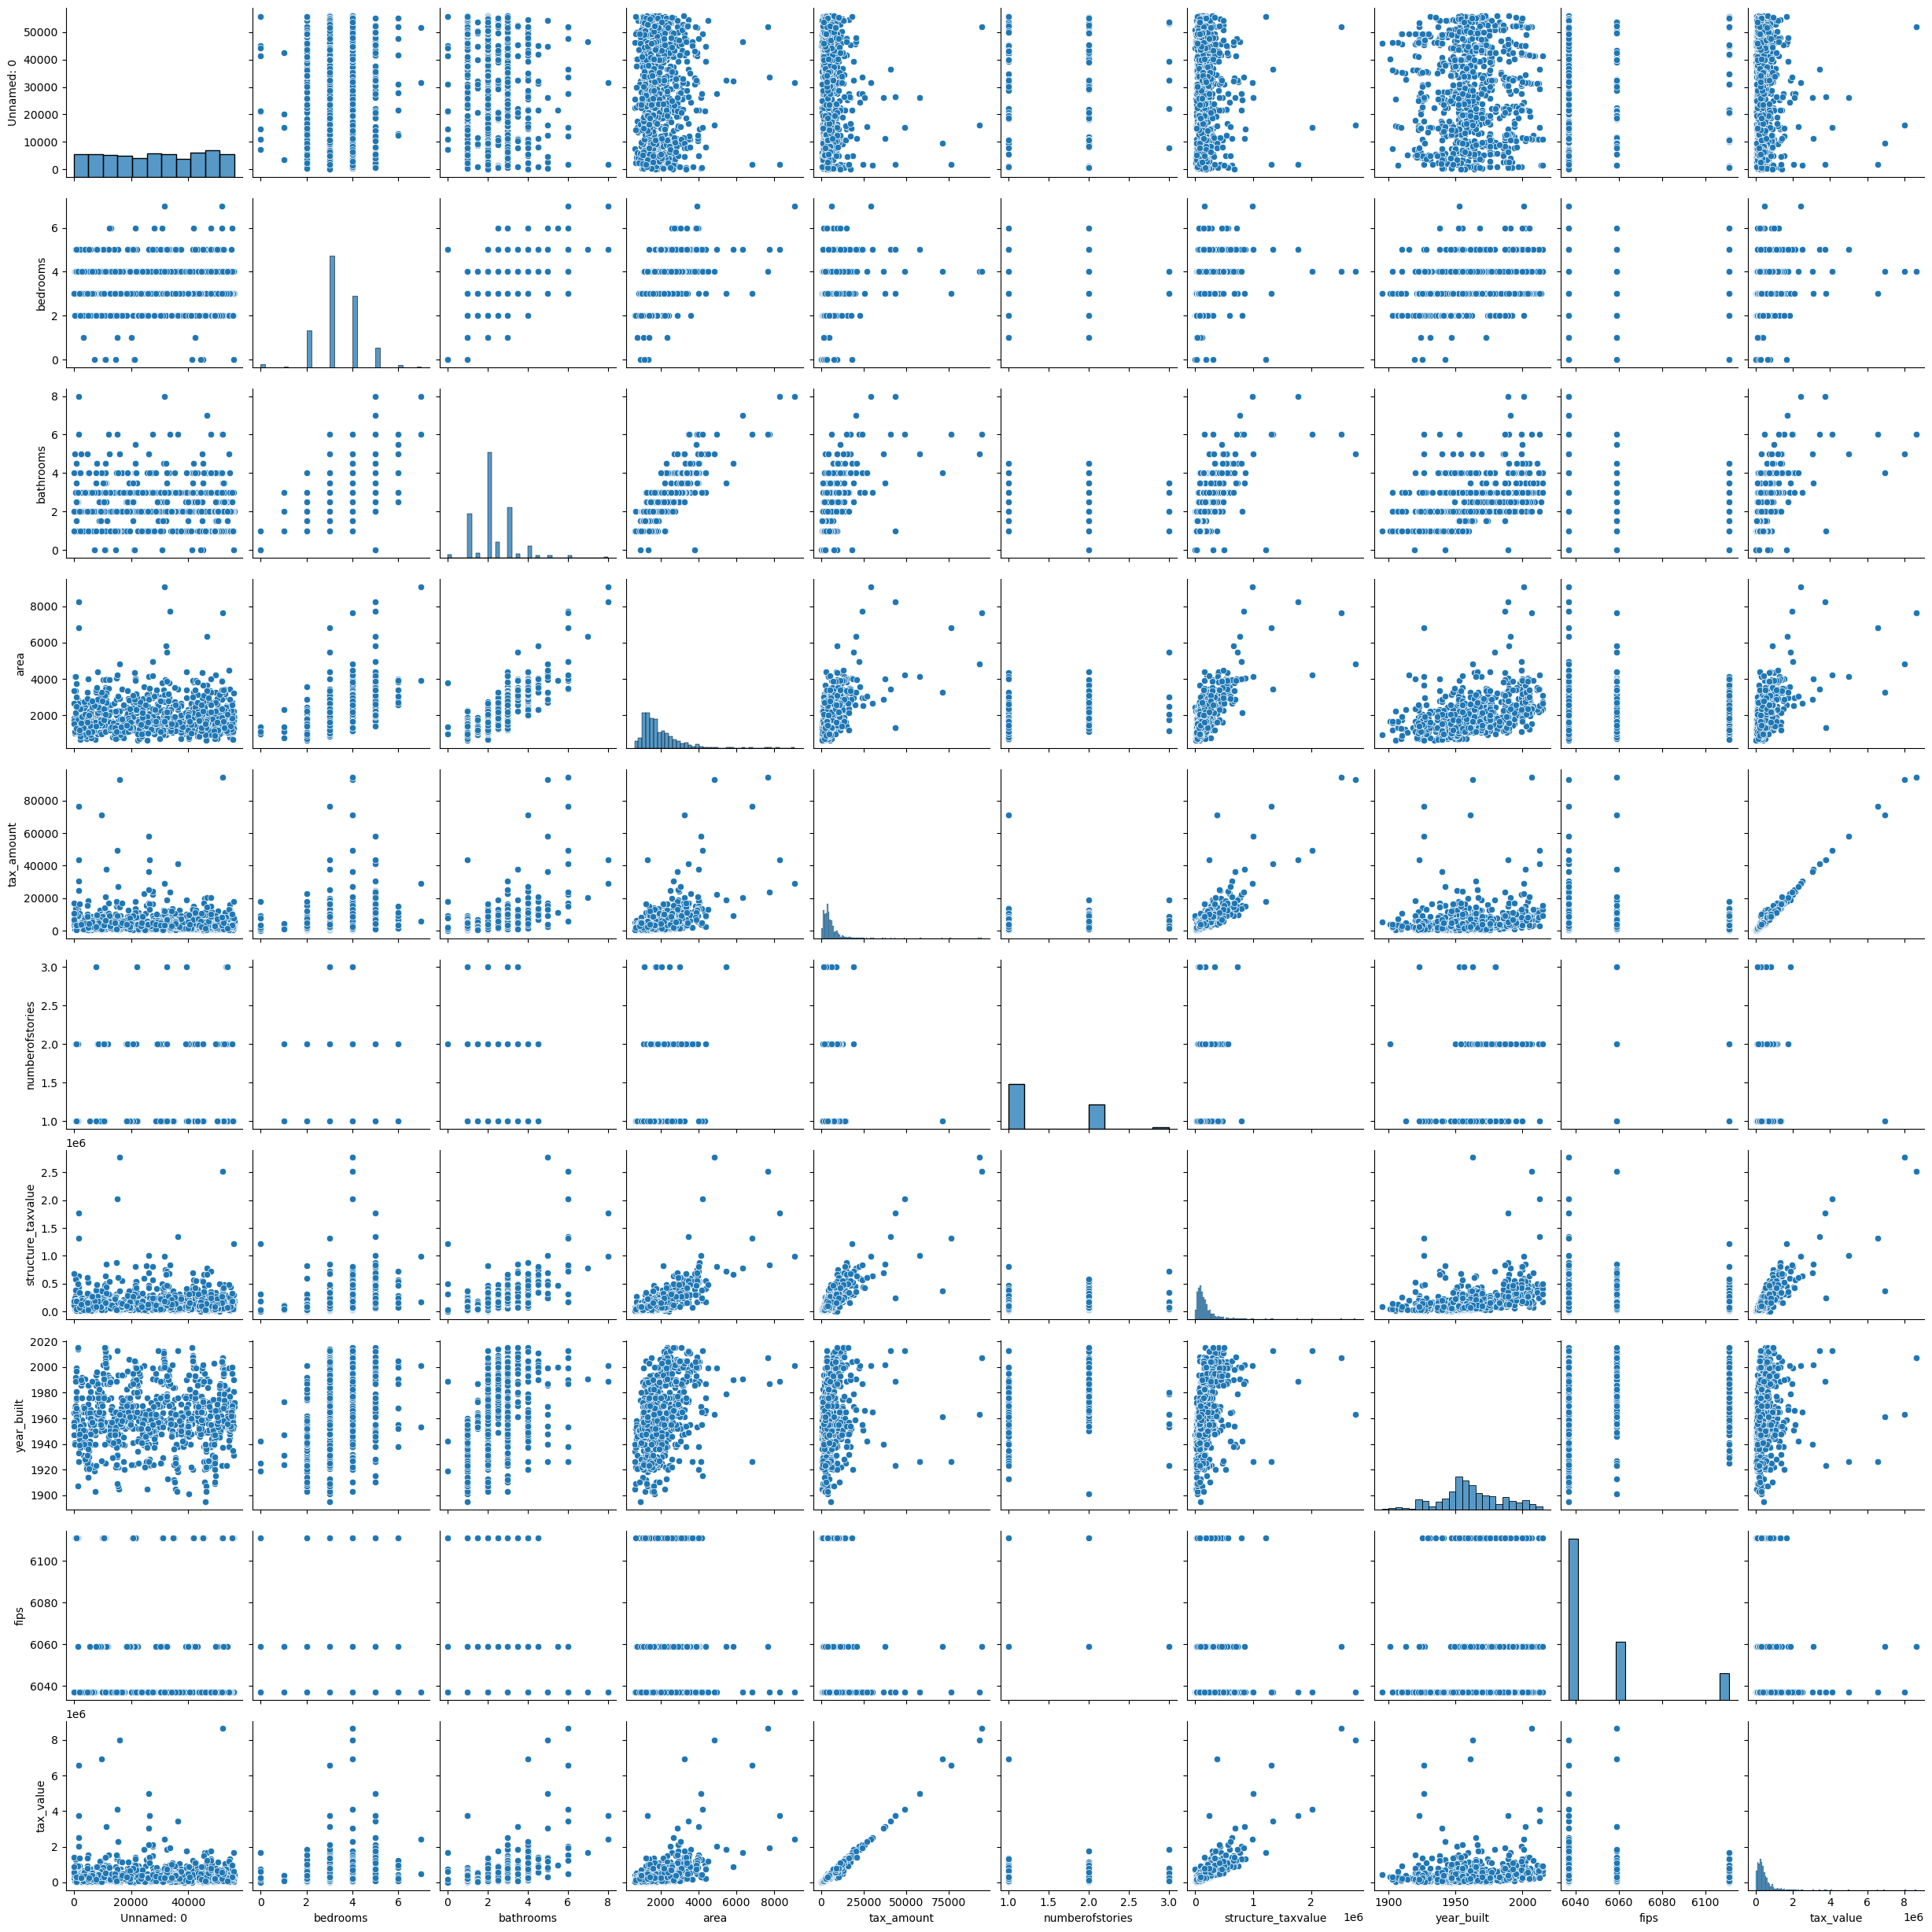

In [5]:
df_sample = df.sample(n=1000)
#overview of correlations and data distribution
sns.pairplot(df_sample)

In [6]:
#stored the sourced zillow_data_dictionary.xlsx into a variable using pd.read_excel to pull the local file 
#into my notebook
dd = pd.read_excel('zillow_data_dictionary.xlsx')

In [7]:
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


# Prepare 
## prepare_zillow()
* Removed outliers and updated fips to match the represented county and state
* Turned fips and year built into objects to represent categories instead of numbers
* Encoded all categorical features and peformed the test,train,split to separate data for later modeling
* Imputed missing values for numerical columns replacing missing values with the median of each column
* Replaced missing values in categorical column with 'Unknown' instead of dropping the column

* Got the shape of each variable to verify the split 
* Verified all null values have been handled
* Added the target feature for our y_train, y_validate, y_test
* Added x to modeling variables 
* Dropped target feature and additional features to prevent leakage in modeling
* Scaled the data

In [8]:
cols = ['bedrooms', 'bathrooms', 'area', 'tax_amount',
       'numberofstories', 'structure_taxvalue', 'zoning_desc', 'trans_date',
       'year_built', 'fips', 'prop_landuse_desc', 'county_landuse_code',
       'tax_value'],

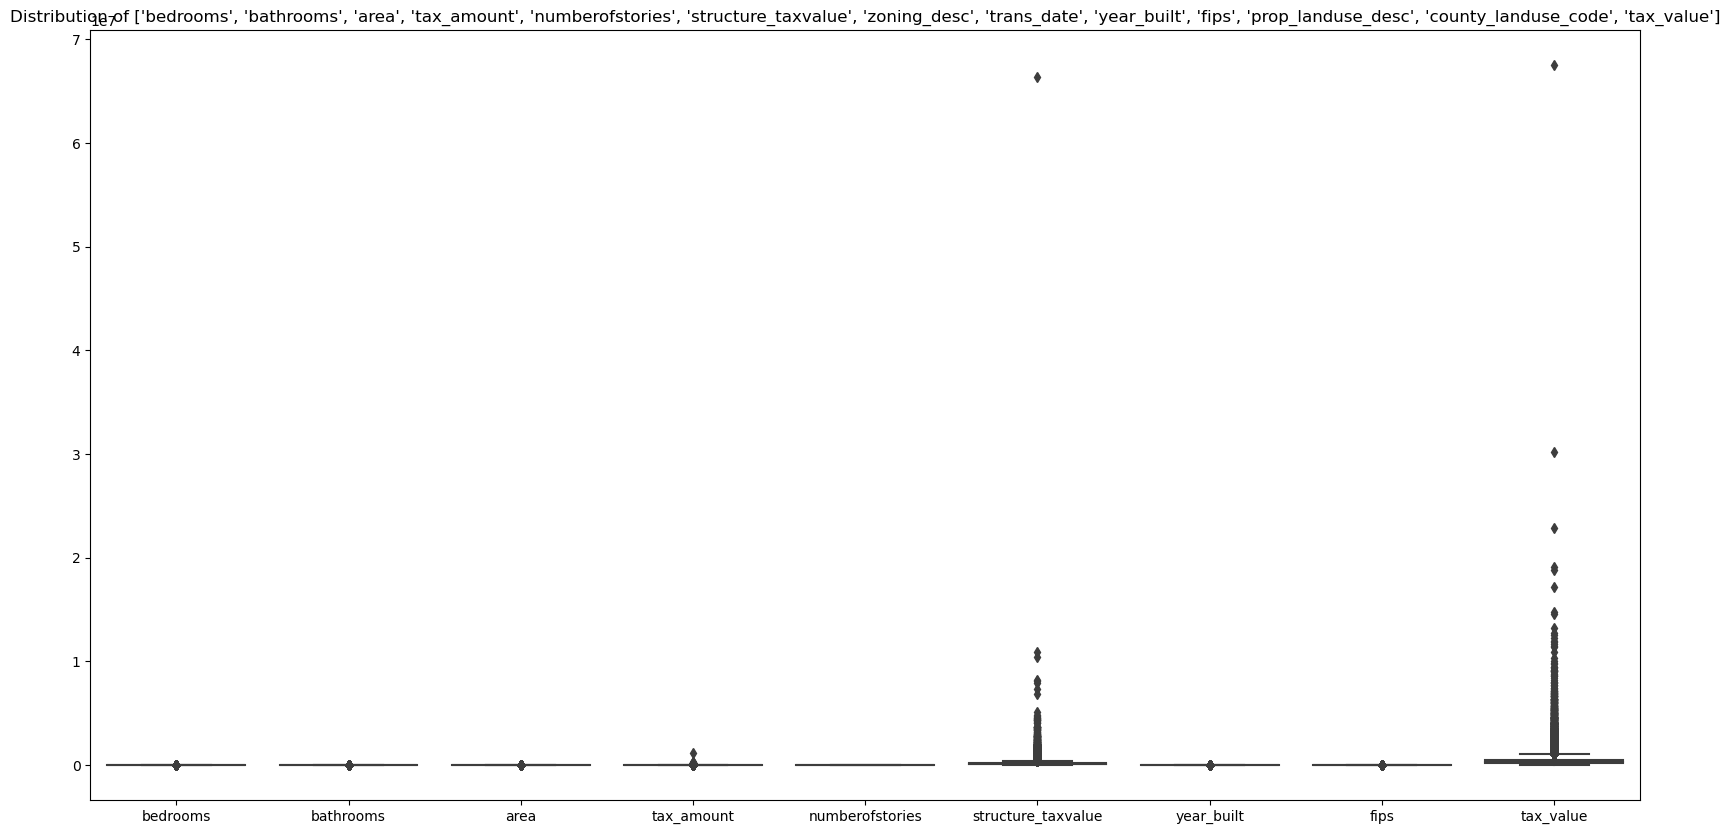

In [9]:
#Plotted data to get a view of outliers.
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

In [10]:
#split data into train, validate, test for modeling 
train, validate, test, train_validate = wrangle.prepare_zillow(df)

In [11]:
train.shape, validate.shape, test.shape

((7665, 14), (3286, 14), (2738, 14))

In [12]:
train.isnull().sum()

Unnamed: 0             0
bedrooms               0
bathrooms              0
area                   0
tax_amount             0
numberofstories        0
structure_taxvalue     0
zoning_desc            0
trans_date             0
year_built             0
fips                   0
prop_landuse_desc      0
county_landuse_code    0
tax_value              0
dtype: int64

In [13]:
y_train = train['tax_value']
y_validate = validate['tax_value']
y_test = test['tax_value']

In [14]:
x_train = train
x_validate = validate
x_test = test

In [15]:
x_train = x_train.drop(columns=['tax_value','tax_amount', 'structure_taxvalue','Unnamed: 0'])
x_validate = x_validate.drop(columns=['tax_value','tax_amount', 'structure_taxvalue','Unnamed: 0'])
x_test = x_test.drop(columns=['tax_value','tax_amount', 'structure_taxvalue','Unnamed: 0'])

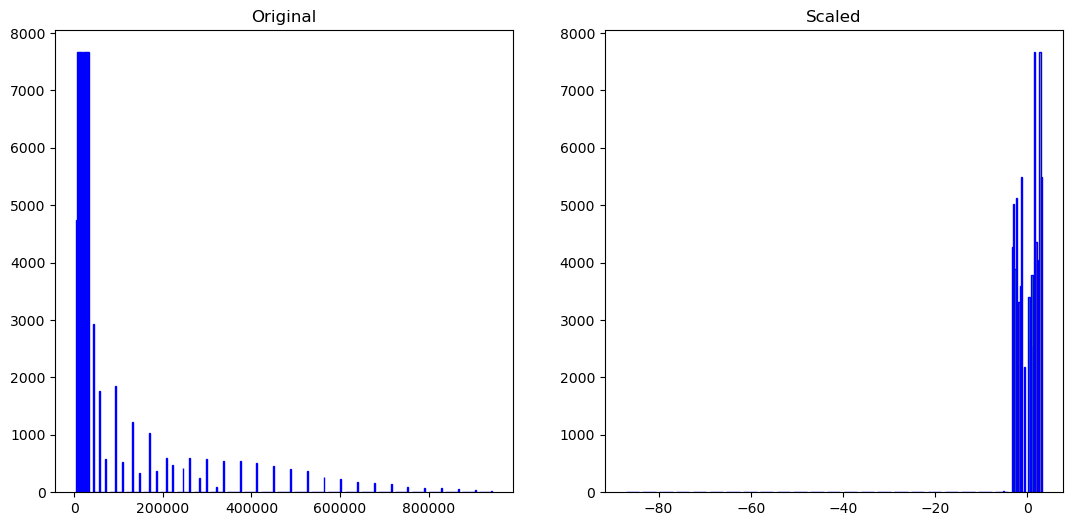

In [16]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')
plt.show()

# Exploration

In [17]:
from scipy.stats import ttest_ind
corr, p = stats.pearsonr(train.tax_value, train['area'])
corr, p

(0.36013270688554083, 1.7909007972316992e-233)

In [53]:
from scipy.stats import ttest_ind
corr, p = stats.pearsonr(train.tax_value, train['bedrooms'])
corr, p

(0.1340961365940234, 4.3183573686695516e-32)

In [54]:
from scipy.stats import ttest_ind
corr, p = stats.pearsonr(train.tax_value, train['bathrooms'])
corr, p

(0.2920223284787084, 1.4953085656997597e-150)

In [46]:
#Lets run a t-test to compare observed mean to theoretical one
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "The tax value mean of homes is <= mean area of all homes"
alternative_hypothesis = "The area mean of homes is > mean tax_value of all homes"


t, p = stats.ttest_1samp(train.tax_value, train['area'].mean())



#The function does the heavy lifting here. It computes the 
#t-test statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(t, p/2, alpha)


Reject the null hypothesis that The area mean of homes is <= mean tax_value of all homes
Sufficient evidence to move forward understanding that The area mean of homes is > mean tax_value of all homes
152.38463969989454 0.0 0.05


In [50]:
#Lets run a t-test to compare observed mean to theoretical one
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "The tax value mean of homes is <= mean bedrooms of all homes"
alternative_hypothesis = "The bedrooms mean of homes is > mean tax_value of all homes"


t, p = stats.ttest_1samp(train.tax_value, train['bedrooms'].mean())



#The function does the heavy lifting here. It computes the 
#t-test statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(t, p/2, alpha)

Reject the null hypothesis that The tax value mean of homes is <= mean bedrooms of all homes
Sufficient evidence to move forward understanding that The bedrooms mean of homes is > mean tax_value of all homes
153.15394038016987 0.0 0.05


In [52]:
#Lets run a t-test to compare observed mean to theoretical one
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "The tax value mean of homes is <= mean bathrooms of all homes"
alternative_hypothesis = "The bathrooms mean of homes is > mean tax_value of all homes"


t, p = stats.ttest_1samp(train.tax_value, train['bathrooms'].mean())



#The function does the heavy lifting here. It computes the 
#t-test statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(t, p/2, alpha)

Reject the null hypothesis that The tax value mean of homes is <= mean bathrooms of all homes
Sufficient evidence to move forward understanding that The bathrooms mean of homes is > mean tax_value of all homes
153.15449087300152 0.0 0.05


# Exploration Summary

* Created our hypothesis 
* Vizualised our feature relationships 
* Tested our hypothesis to verify our findings


# Modeling

* Used select_kbest() to find my two best features for the target
* Created a histogram to give a vizual of the target data in the training set
* Got the RMSE using mean and median to verify which would be used as baseline. Mean will be used since it is lower
* Created four different models, the Polynomial Model performed thet best so it was used for testing

In [21]:
modeling_feats = ['bedrooms', 'bathrooms', 'area', 'numberofstories', 'zoning_desc',
       'trans_date', 'year_built', 'fips', 'prop_landuse_desc',
       'county_landuse_code'] 

In [22]:
def select_kbest(X, y, k=2):
    '''
    X: dataframe of independent features
    y: single pandas Series (a target)
    k: kwarg, a number of k best features to select
    '''
    # make our kbest object:
    kbest = SelectKBest(f_regression, k=k)
    # fit it from x and y's relationships
    kbest.fit(X, y)
    # get the support values:
    mask = kbest.get_support()
    return X.columns[mask]

In [23]:
wrangle.select_kbest(x_train[modeling_feats], y_train)

Index(['bathrooms', 'area'], dtype='object')

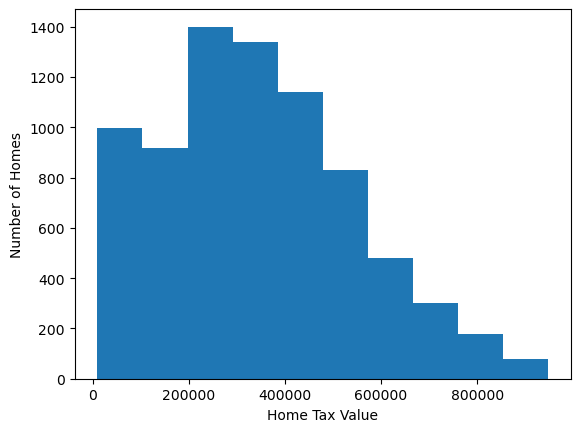

In [24]:
#distribution of target data
plt.hist(y_train)
plt.xlabel('Home Tax Value')
plt.ylabel('Number of Homes')
plt.show()

In [25]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict tax_value_pred_mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean
# 2. compute tax_value_pred_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median
# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)


print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))



RMSE using Mean
Train/In-Sample:  197764.33 
Validate/Out-of-Sample:  195345.66


In [26]:
# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

In [27]:
print("\nRMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Median
Train/In-Sample:  198692.45 
Validate/Out-of-Sample:  196311.79


In [28]:
# create the model object
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train.tax_value)
# predict train
y_train['tax_value_pred_lm'] = lm.predict(x_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)
# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(x_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  181634.2394536367 
Validation/Out-of-Sample:  179061.21133024705


In [29]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled
x_train_degree2 = pf.fit_transform(x_train_scaled)
# transform X_validate_scaled & X_test_scaled
x_validate_degree2 = pf.transform(x_validate_scaled)
x_test_degree2 = pf.transform(x_test_scaled)
# create the model object
lm2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(x_train_degree2, y_train.tax_value)
# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(x_train_degree2)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)
# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(x_validate_degree2)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  181318.27659806778 
Validation/Out-of-Sample:  179543.3717596972


In [30]:
# create the model object
lars = LassoLars(alpha=1.0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(x_train, y_train.tax_value)
# predict train
y_train['tax_value_pred_lars'] = lars.predict(x_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)
# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(x_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  181636.22400729096 
Validation/Out-of-Sample:  179078.25918535833


In [31]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(x_train, y_train.tax_value)
# predict train
y_train['tax_value_pred_glm'] = glm.predict(x_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)
# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(x_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,2))

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  197764.32641906064 
Validation/Out-of-Sample:  195345.66


In [37]:
y_test = pd.DataFrame(y_test)
# predict on test
y_test['tax_value_pred_lm'] = lm.predict(x_test)
# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nOut-of-Sample Performance: ", round(rmse_test,2))

RMSE for Polynomial Model using LinearRegression
Out-of-Sample Performance:  177884.32


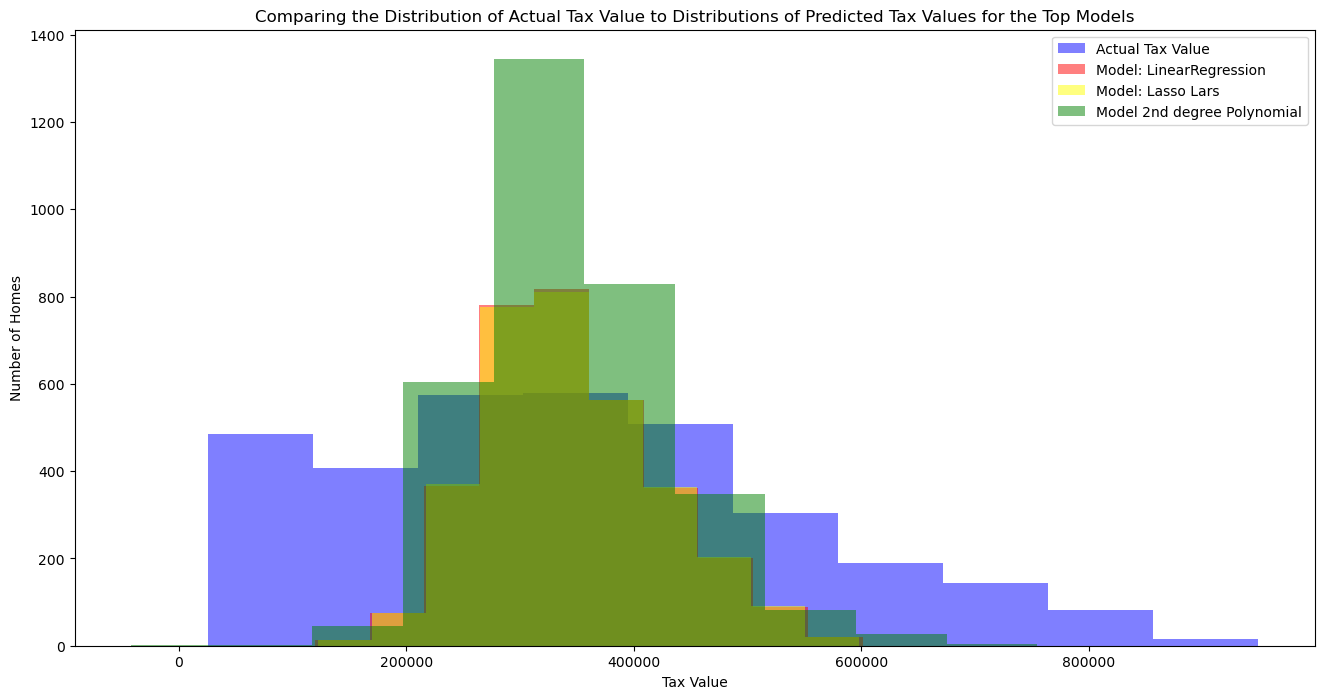

In [38]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Tax Value ")
plt.hist(y_validate.tax_value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_value_pred_lars, color='yellow', alpha=.5, label="Model: Lasso Lars")
plt.hist(y_validate.tax_value_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Tax Value to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

# Takeaways
* Our Polynomial Model performed best out of the four created models.

* Baseline is $195,345.66

* Model is $177,884.32

* Our model beat baseline by $17,461.34

# Conclusion

* Exploration proved the correlation of our features so accounting for area, number of 
bathroomss, and bedrooms will help better predict a homes tax value.
* Our model out performs baseline and would bring our predictions $17,461 closer to the actual value of the home.

# Recommendations
* Implement our model, we can use this to our advantage when selling marketing to real estate agents and investing groups

# Next Steps
* Improve on our model by acquiring more data about each property and using tax information to help get a more accurate prediction.